In [17]:
# Useful starting lines
%matplotlib inline
import numpy as np
from helpers import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [51]:
# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)


Use `least_squares` to compute w, and visualize the results.

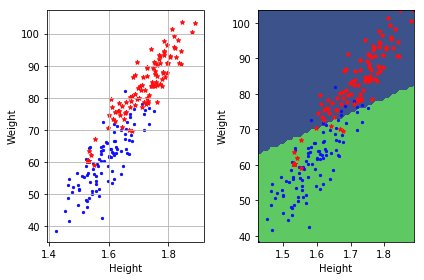

In [52]:
def least_squares(y, tx):
    """calculate the least squares."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

def least_square_classification_demo(y, x):
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)

    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [60]:
def sigmoid(t):
    """apply sigmoid function on t.
    1 line of code
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return 1 / (1 + np.exp(np.multiply(t, -1)))

In [100]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.
    at most 4 lines of code """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    
    return np.sqrt(np.mean(np.square(tx.dot(w) - y))) / tx.shape[0]
    

In [98]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss.
        at most 4 lines of code """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    
    return tx.T.dot(sigmoid(tx.dot(w)) - y)

In [101]:
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))

g = calculate_gradient(y, tx, w)

print(cost)

(200, 3)
0.003570714214271425


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [110]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    Requiers some lines of code
    """


    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    w = w - gamma * grad
    
    return loss, w

Demo!

Current iteration=0, loss=0.003570714214271425
Current iteration=100, loss=0.017041630748575624
Current iteration=200, loss=0.019246279912172995
Current iteration=300, loss=0.02045282944304348
Current iteration=400, loss=0.021143090834112085
Current iteration=500, loss=0.021551154423677544
Current iteration=600, loss=0.0217971524673739
Current iteration=700, loss=0.02194718687523738
Current iteration=800, loss=0.0220393376054764
Current iteration=900, loss=0.022096178939437102
Current iteration=1000, loss=0.022131332515061275
Current iteration=1100, loss=0.0221531084722182
Current iteration=1200, loss=0.022166611129274726
Current iteration=1300, loss=0.022174988931766282
Current iteration=1400, loss=0.022180188983875002
Current iteration=1500, loss=0.022183417393905776
Current iteration=1600, loss=0.022185422022234485
loss=0.022186627633311983


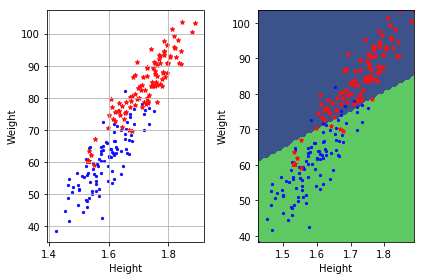

In [112]:
def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 100000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)